# Final Project Statictic Theory -
## Is there a difference between overweight people in their lifestyle and family genetics?


-Ariel Shamis


-Adam Yannay

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

dataset = fetch_ucirepo(id=544)
X = dataset.data.features
y = dataset.data.targets

# Optional: View metadata and variable info
print("\nMetadata:\n", dataset.metadata)
print("\nVariables:\n", dataset.variables)

# STEP 4: Display the data (optional)
# print("\nFeature sample:\n", X.head())
# print("\nTarget sample:\n", y.head())



Metadata:
 {'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 3

# EDA

First we want to  organize the data

In [ ]:
import pandas as pd

# Load your data (replace with your actual CSV file path if needed)
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1)

# Binary label encoding
binary_map = {
    "Gender": {"Female": 0, "Male": 1},
    "family_history_with_overweight": {"no": 0, "yes": 1},
    "FAVC": {"no": 0, "yes": 1},
    "SMOKE": {"no": 0, "yes": 1},
    "SCC": {"no": 0, "yes": 1},
}

df.replace(binary_map, inplace=True)

# Ordinal encoding for CAEC and CALC
caec_map = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
calc_map = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
df["CAEC"] = df["CAEC"].map(caec_map)
df["CALC"] = df["CALC"].map(calc_map)

# One-hot encode 'MTRANS' and 'NObeyesdad'
df = pd.get_dummies(df, columns=["MTRANS", "NObeyesdad"], drop_first=False)

obese_mask = df.filter(like="NObeyesdad_").columns.str.contains("Obesity", case=False)
obese_colnames = df.filter(like="NObeyesdad_").columns[obese_mask]
df["is_obese"] = (df[obese_colnames].sum(axis=1) > 0).astype(int)



# Save the result if needed
df.to_csv("numerical_data.csv", index=False)





/tmp/ipython-input-3-1389130770.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(binary_map, inplace=True)


In [ ]:
df.shape

(2111, 28)

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,2111.0,0.505921,0.500083,0.00,0.000000,1.000000,1.000000,1.00
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
family_history_with_overweight,2111.0,0.817622,0.386247,0.00,1.000000,1.000000,1.000000,1.00
FAVC,2111.0,0.883941,0.320371,0.00,1.000000,1.000000,1.000000,1.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CAEC,2111.0,1.140692,0.468543,0.00,1.000000,1.000000,1.000000,3.00
SMOKE,2111.0,0.020843,0.142893,0.00,0.000000,0.000000,0.000000,1.00


In [ ]:
df.nunique()

,0
Gender,2
Age,1402
Height,1574
Weight,1525
family_history_with_overweight,2
FAVC,2
FCVC,810
NCP,635
CAEC,4
SMOKE,2


## Make graph for each columns vs 'is_obese'

Categorical Variables vs is_obese:


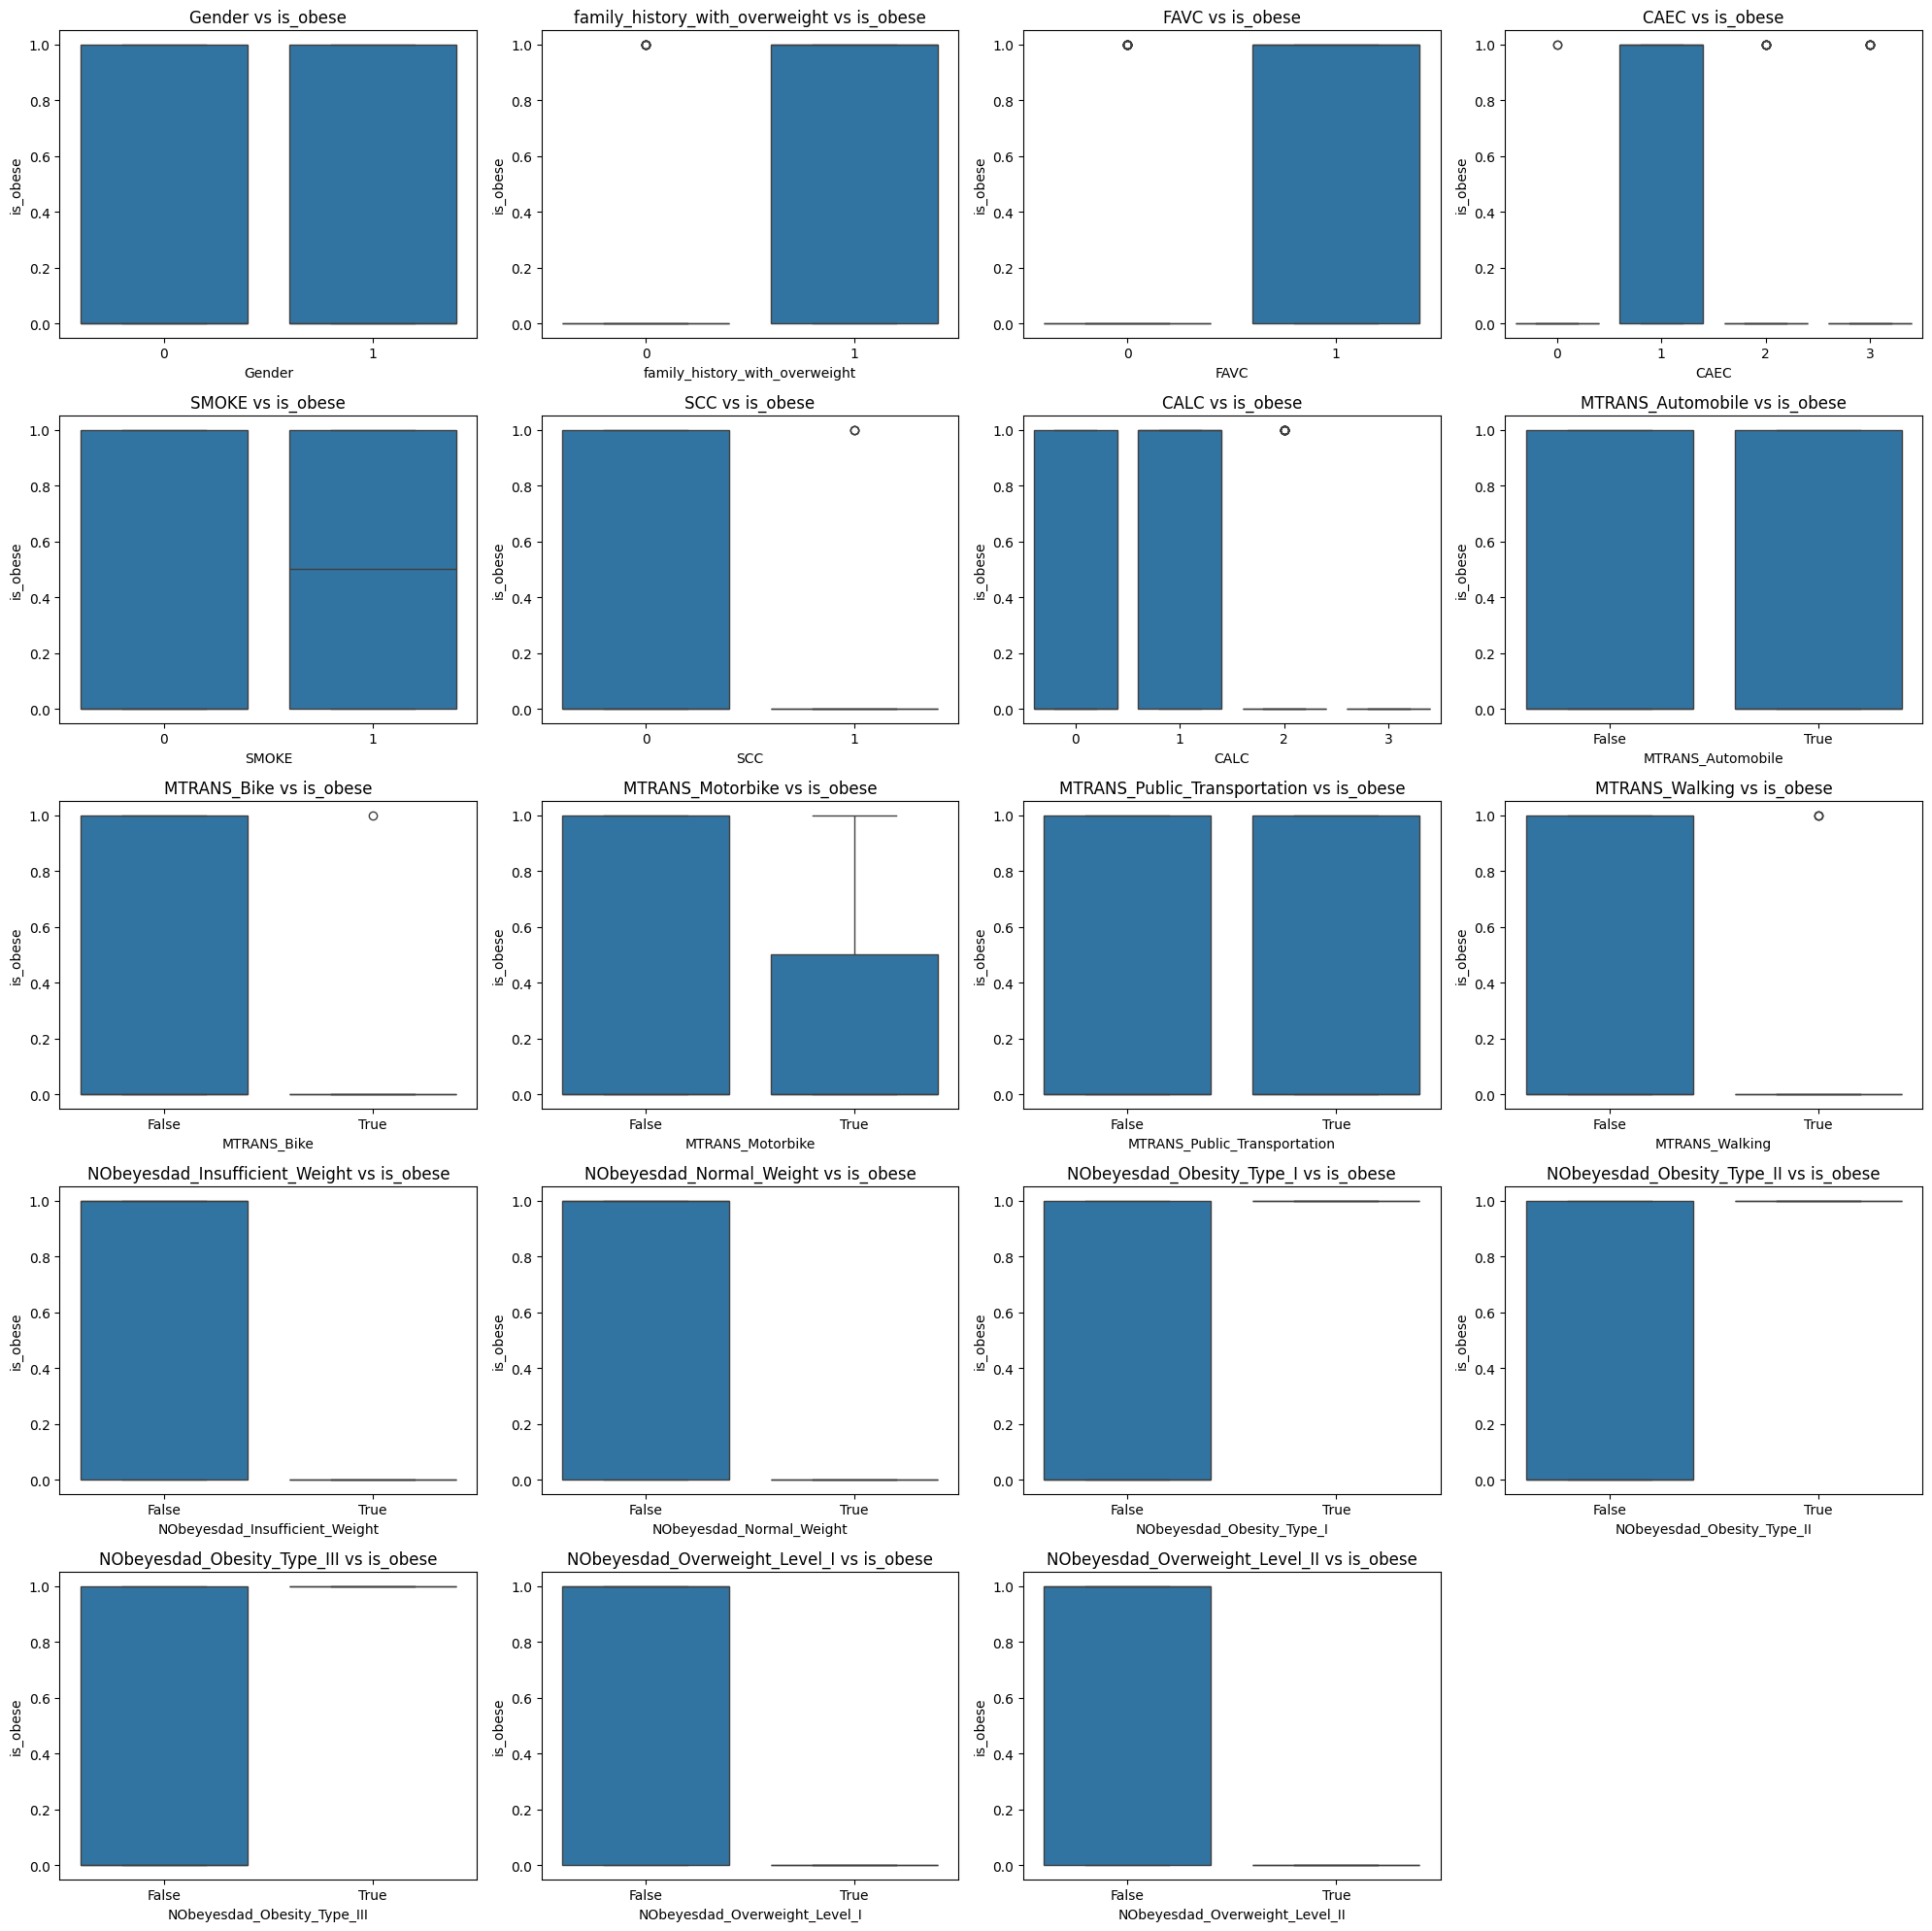

Continuous Variables vs is_obese:


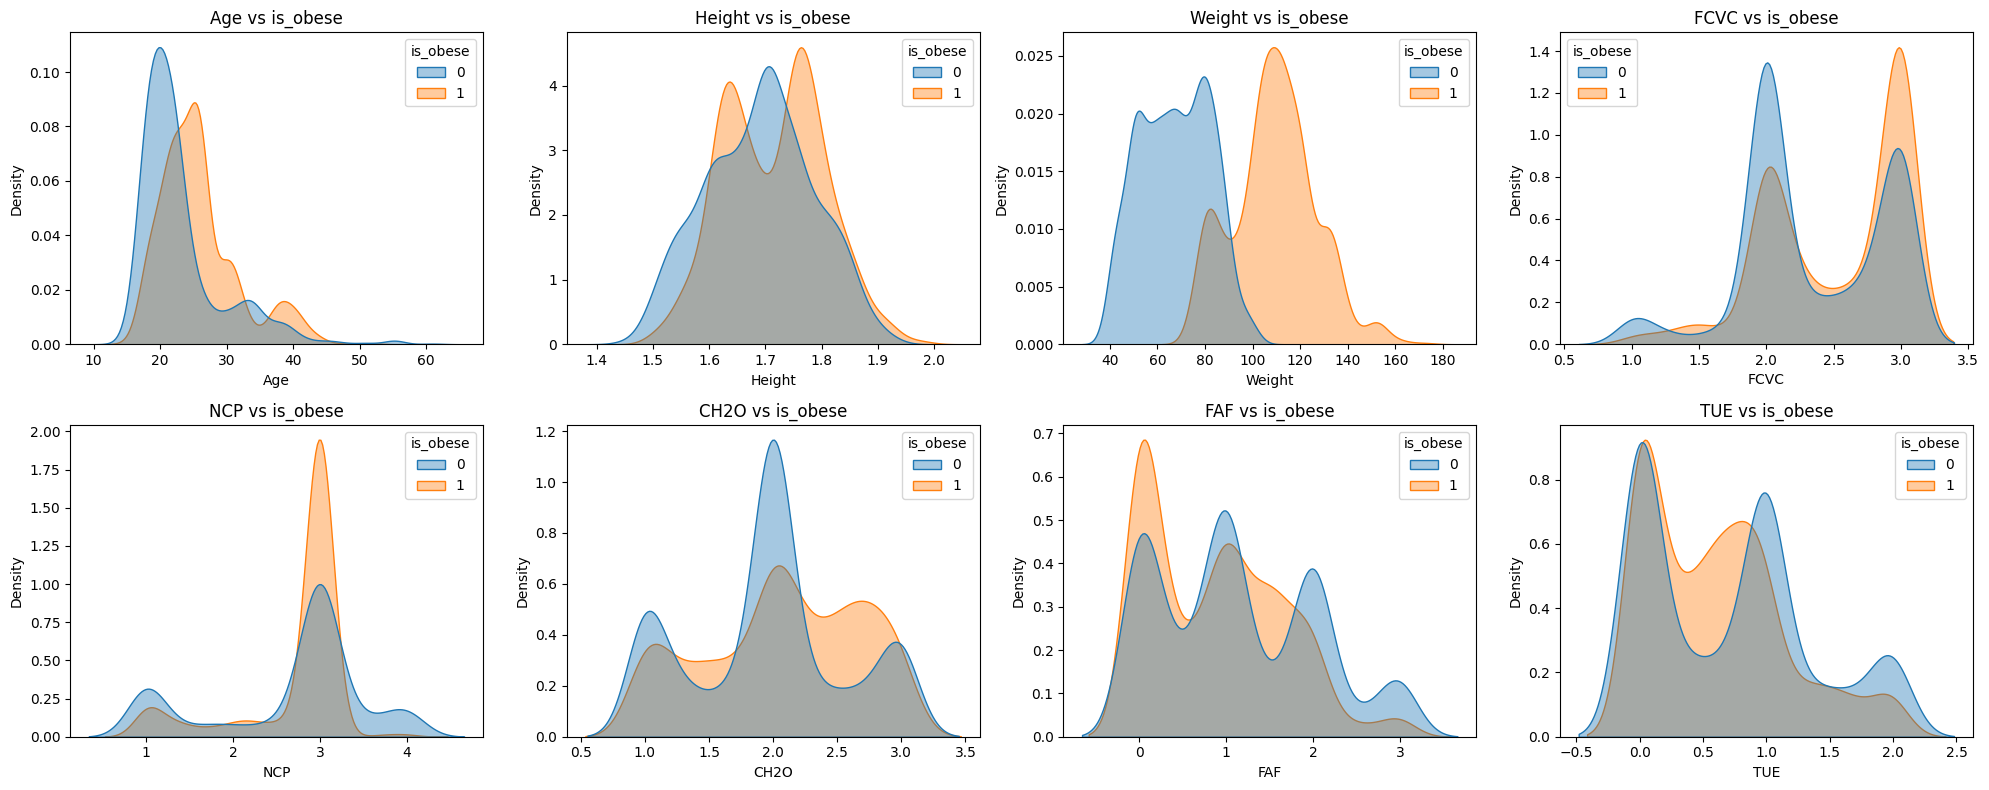

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

categorical_cols = [col for col in df.columns if df[col].nunique() <= 10 and col != "is_obese"]
continuous_cols = [col for col in df.columns if df[col].nunique() > 10 and col != "is_obese"]

def plot_grid(columns, plot_type, n_cols=4, height=4):
    n_rows = math.ceil(len(columns) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * height))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        ax = axes[i]
        if plot_type == "box":
            sns.boxplot(x=col, y="is_obese", data=df, ax=ax)
            ax.set_xlabel(col)
            ax.set_ylabel("is_obese")
        elif plot_type == "kde":
            sns.kdeplot(data=df, x=col, hue="is_obese", fill=True, common_norm=False, alpha=0.4, ax=ax)
            ax.set_xlabel(col)

        ax.set_title(f"{col} vs is_obese")

    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

print("Categorical Variables vs is_obese:")
plot_grid(categorical_cols, plot_type="box")

print("Continuous Variables vs is_obese:")
plot_grid(continuous_cols, plot_type="kde")

## Hitmap to understand Coralation

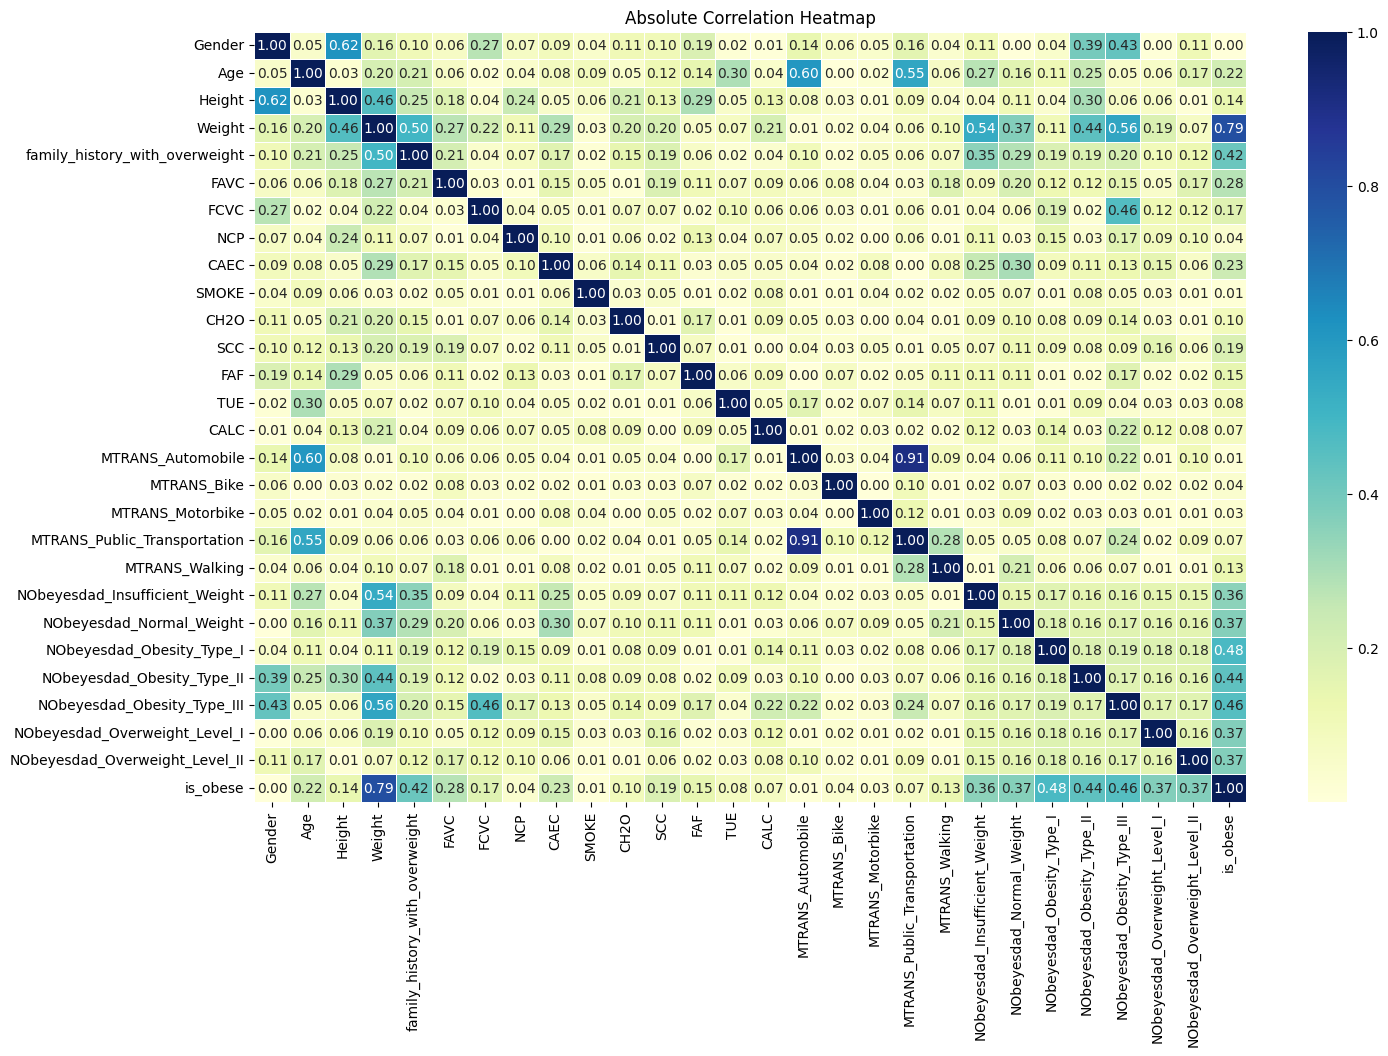

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix and take absolute values
corr_matrix = df.corr().abs()

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

plt.title("Absolute Correlation Heatmap")
plt.show()


 ## Now we use the Chi-squere Method to see the coralation between each Column to our label "is_obese"

/tmp/ipython-input-10-1466226732.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Feature", x="Chi2 Score", data=top_chi2, palette="magma")


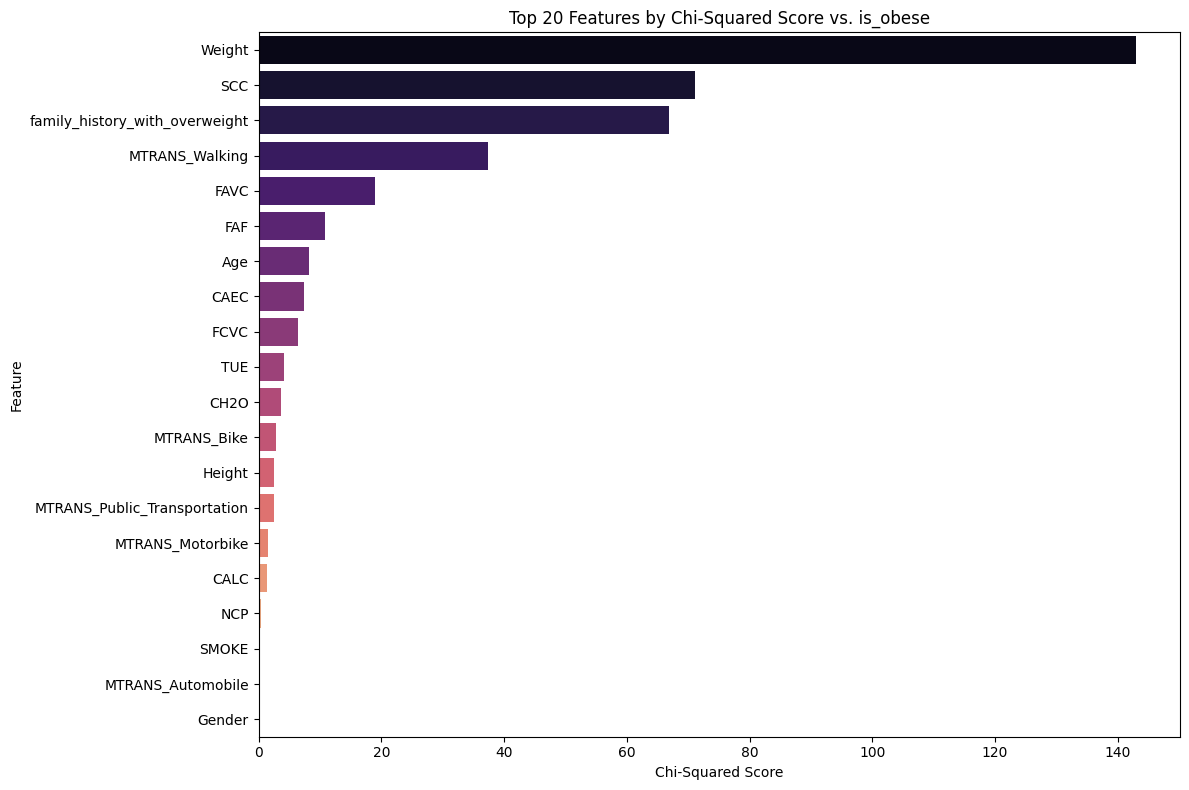

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

exclude_cols = ["is_obese"] + [col for col in df.columns if col.lower().startswith("nobeyesdad_")]
X = df.drop(columns=exclude_cols)
y = df["is_obese"]
X_scaled = MinMaxScaler().fit_transform(X)
chi_scores, p_values = chi2(X_scaled, y)
chi2_df = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi_scores,
    "p-value": p_values
}).sort_values(by="Chi2 Score", ascending=False)

top_n = 20
top_chi2 = chi2_df.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(y="Feature", x="Chi2 Score", data=top_chi2, palette="magma")

plt.title(f"Top {top_n} Features by Chi-Squared Score vs. is_obese")
plt.xlabel("Chi-Squared Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
